In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [78]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

In [79]:
df.shape

(62402, 23)

In [80]:
X = df.drop(['MaxTemp'], axis=1)
y = df[['MaxTemp']]

In [81]:
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [83]:
def build_model(activation = 'relu', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(16,input_dim = 22, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation)) # output 

    #Compile the model 
    model.compile(
        loss = 'mae',
        optimizer  = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse'])
    return model 
    

In [84]:
model = build_model()
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                368       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [85]:
optimizer = ['SGD','RMSprop','Adagrad']
param_grid = dict(optimizer = optimizer)


In [86]:
kf = KFold(n_splits = 5 , shuffle= True , random_state=2023)

In [87]:
model = KerasRegressor(model = build_model, batch_size=32, validation_split=0.2, epochs = 20)

In [88]:
grid_search = GridSearchCV(estimator = model, param_grid= param_grid, cv = kf, scoring = 'neg_mean_absolute_error', refit=True, verbose = 2, n_jobs=-1)

In [89]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Epoch 1/20
1092/1092 [==============================] - 2s 1ms/step - loss: 0.0430 - mae: 0.0430 - mse: 0.0089 - val_loss: 0.0198 - val_mae: 0.0198 - val_mse: 9.6937e-04
Epoch 2/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.0219 - mae: 0.0219 - mse: 0.0012 - val_loss: 0.0224 - val_mae: 0.0224 - val_mse: 0.0012
Epoch 3/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.0211 - mae: 0.0211 - mse: 0.0011 - val_loss: 0.0183 - val_mae: 0.0183 - val_mse: 0.0010
Epoch 4/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.0208 - mae: 0.0208 - mse: 0.0011 - val_loss: 0.0182 - val_mae: 0.0182 - val_mse: 9.5744e-04
Epoch 5/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.0207 - mae: 0.0207 - mse: 0.0011 - val_loss: 0.0182 - val_mae: 0.0182 - val_mse: 9.3408e-04
Epoch 6/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.0195 - mae: 0.0195 

GridSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x000001C0EBD4EA70>, validation_split=0.2),
             n_jobs=-1, param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             scoring='neg_mean_absolute_error', verbose=2)

In [90]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: -0.017110 using {'optimizer': 'Adagrad'}


In [91]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x000001C0EBD4EA70>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


In [92]:
best_mlp_model.fit(X_train, y_train, epochs=20, validation_data = (X_test,y_test), verbose = 2)

Epoch 1/20
1366/1366 - 2s - loss: 0.0272 - mae: 0.0272 - mse: 0.0021 - val_loss: 0.0380 - val_mae: 0.0380 - val_mse: 0.0021 - 2s/epoch - 2ms/step
Epoch 2/20
1366/1366 - 2s - loss: 0.0214 - mae: 0.0214 - mse: 0.0011 - val_loss: 0.0628 - val_mae: 0.0628 - val_mse: 0.0046 - 2s/epoch - 1ms/step
Epoch 3/20
1366/1366 - 2s - loss: 0.0212 - mae: 0.0212 - mse: 0.0011 - val_loss: 0.0202 - val_mae: 0.0202 - val_mse: 0.0011 - 2s/epoch - 1ms/step
Epoch 4/20
1366/1366 - 2s - loss: 0.0198 - mae: 0.0198 - mse: 0.0010 - val_loss: 0.0412 - val_mae: 0.0412 - val_mse: 0.0025 - 2s/epoch - 1ms/step
Epoch 5/20
1366/1366 - 2s - loss: 0.0195 - mae: 0.0195 - mse: 0.0010 - val_loss: 0.0268 - val_mae: 0.0268 - val_mse: 0.0015 - 2s/epoch - 1ms/step
Epoch 6/20
1366/1366 - 2s - loss: 0.0187 - mae: 0.0187 - mse: 9.8346e-04 - val_loss: 0.0173 - val_mae: 0.0173 - val_mse: 9.2814e-04 - 2s/epoch - 1ms/step
Epoch 7/20
1366/1366 - 2s - loss: 0.0188 - mae: 0.0188 - mse: 9.8212e-04 - val_loss: 0.0204 - val_mae: 0.0204 - val_

KerasRegressor(
	model=<function build_model at 0x000001C0EBD4EA70>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

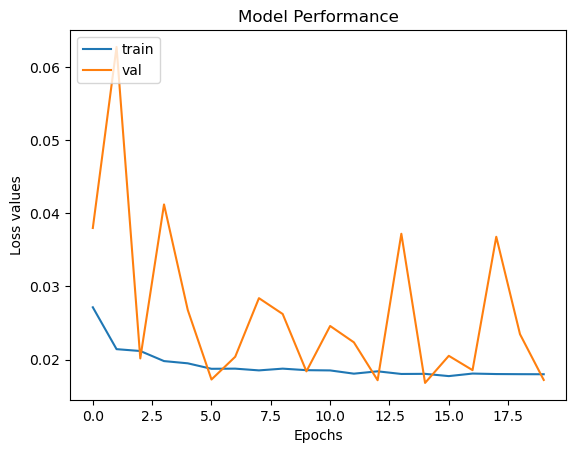

In [93]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss values')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

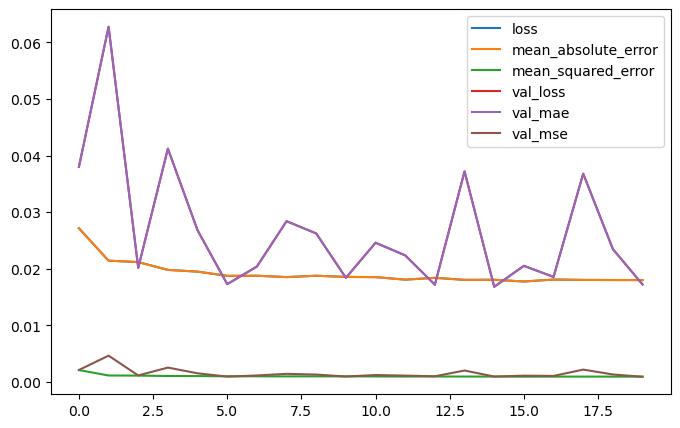

In [94]:
pd.DataFrame(best_mlp_model.history_).plot(figsize = (8,5))
plt.show()

In [95]:
predictions = best_mlp_model.predict(X_test)

586/586 [==============================] - 0s 714us/step


In [96]:
predictions_unscaled = scaler_y.inverse_transform(predictions)

In [97]:
predictions_unscaled[:10]

array([[16.164871 ],
       [22.20967  ],
       [21.400312 ],
       [15.552032 ],
       [ 1.0248821],
       [11.005318 ],
       [33.161583 ],
       [17.374537 ],
       [13.603649 ],
       [15.683256 ]], dtype=float32)

In [98]:
y_test_unscaled = scaler_y.inverse_transform(y_test)

In [99]:
y_test_unscaled[:10]

array([[13.5],
       [23.2],
       [22. ],
       [15.1],
       [-0.6],
       [10.4],
       [33.2],
       [16.2],
       [14.8],
       [15.8]])

In [100]:
print('R2:', metrics.r2_score(y_test_unscaled, predictions_unscaled))
print('MAE:', metrics.mean_absolute_error(y_test_unscaled, predictions_unscaled))
print('MSE:', metrics.mean_squared_error(y_test_unscaled, predictions_unscaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_unscaled, predictions_unscaled)))

R2: 0.9526885279220991
MAE: 0.8881996054355566
MSE: 2.3936854055464383
RMSE: 1.5471539695668426


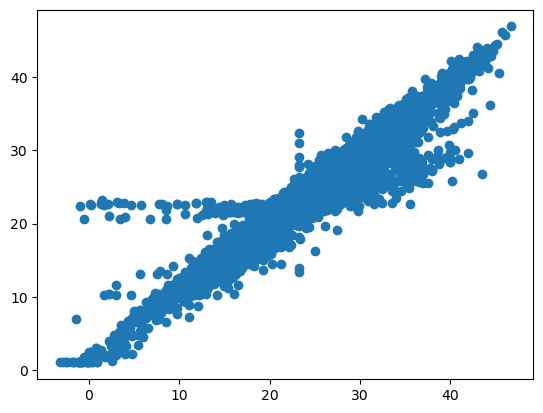

In [101]:
plt.scatter(y_test_unscaled, predictions_unscaled)

c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: ylabel='Count'>

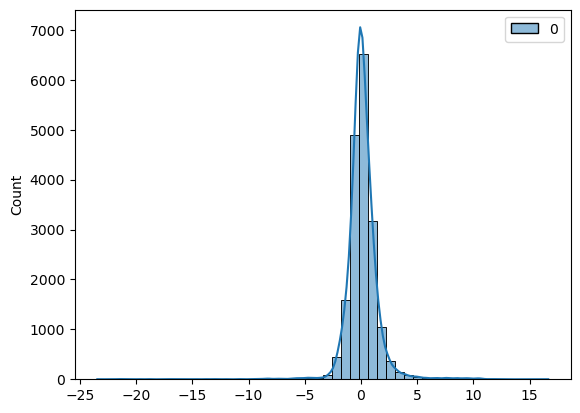

In [102]:
sns.histplot((y_test_unscaled-predictions_unscaled), bins=50, kde=True)

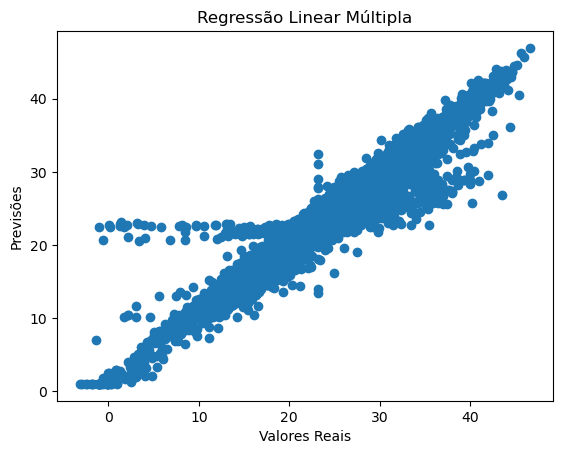

In [103]:
plt.scatter(y_test_unscaled, predictions_unscaled)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Linear Múltipla')
plt.show()